# Cargando librerías

In [1]:
!python --version

Python 3.8.0


In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.mobilenet import preprocess_input
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout,Flatten,Dense,Activation
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image

import math

from mlxtend.evaluate import confusion_matrix
import itertools

In [4]:
K.clear_session()

# Cargando Modelo

In [5]:
cnn = tf.keras.models.load_model('Modelo/modelo1.h5')
# Check its architecture
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               33554560  
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3

# Testeando el modelo

In [6]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    #directory="/content/drive/MyDrive/Clasificacion-de-monedas-peruanas-con-Redes-Neuronales-Convolucionales/Datos/Pruebas",
    directory="C:/Users/DELL/Google Drive/Clasificacion-de-monedas-peruanas-con-Redes-Neuronales-Convolucionales/Datos/Pruebas",
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=3,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 21 images belonging to 1 classes.


In [7]:
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_generator.reset()
pred = cnn.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)

C:\Users\DELL\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
7/7 [==============================] - 1s 22ms/step


In [8]:
predicted_class_indices=np.argmax(pred,axis=1)

In [9]:
print(predicted_class_indices)
print(len(predicted_class_indices))

[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
21


In [10]:
labels= {'10_cent': 0, '20_cent': 1}

In [11]:
labels=dict((v,k) for k,v in labels.items())
predictions=[labels[k] for k in predicted_class_indices]

In [12]:
filenames=test_generator.filenames
results=pd.DataFrame({'Filename':filenames,
                      'Predictions':predictions})

In [13]:
real_class_indices=[]
for i in range(0,len(filenames)):
    your_path = filenames[i]
    path_list = your_path.split(os.sep)
    if ('10_cent' in path_list[1]):
        real_class_indices.append(0)
    #if ('1_sol' in path_list[1]):
    #    real_class_indices.append(1)
    if ('20_cent' in path_list[1]):
        real_class_indices.append(1)
    #if ('50_cent' in path_list[1]):
    #    real_class_indices.append(3)
    #if ('5_soles' in path_list[1]):
    #    real_class_indices.append(4)
#{'10_cent': 0, '1_sol': 1, '20_cent': 2, '50_cent': 3, '5_soles': 4}
#'10_cent': 0, '1_sol': 1, '20_cent': 2, '50_cent': 3, '5_soles': 4
print(real_class_indices)
print(len(real_class_indices))
#real_class_indices = np.array(real_class_indices)


[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
21


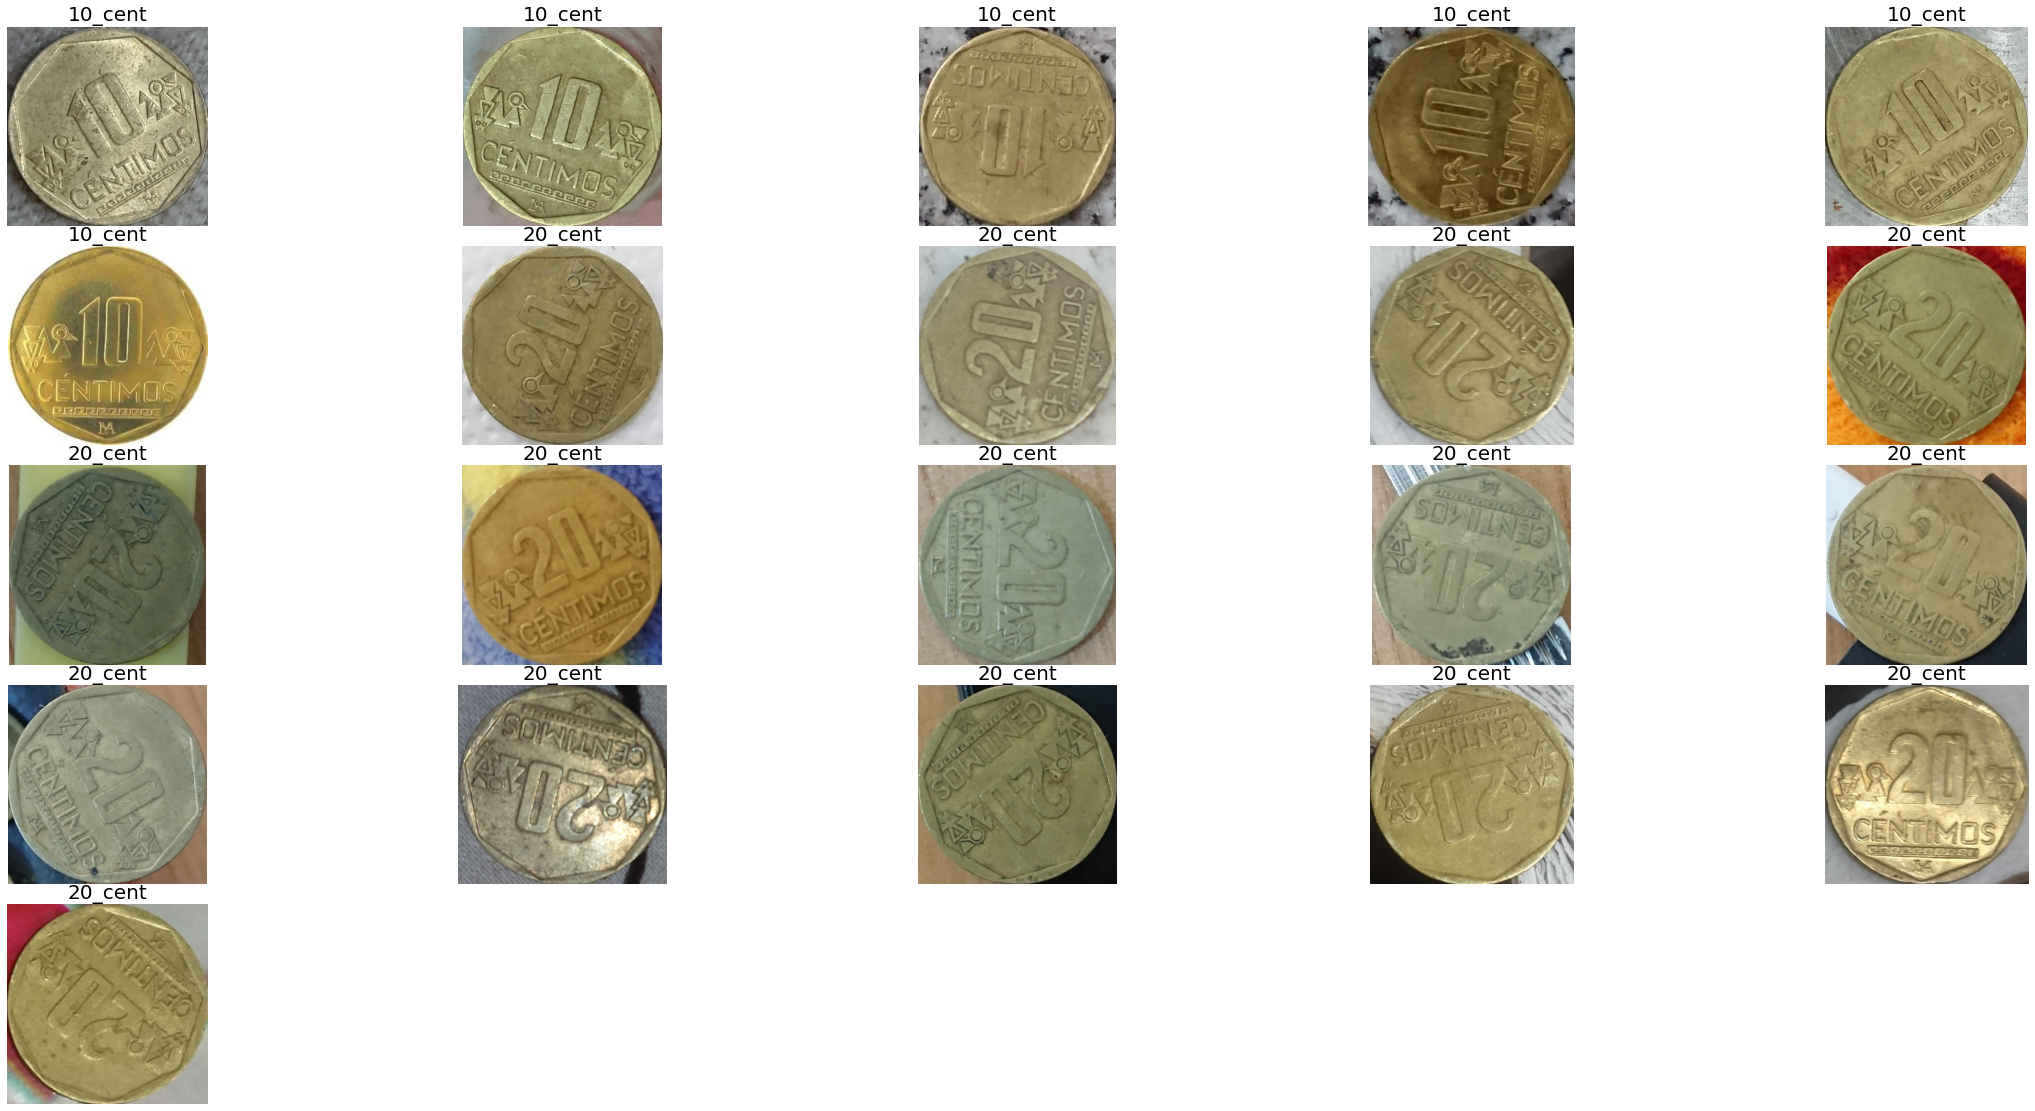

In [14]:
fig = plt.figure(figsize=(40,40))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
rows=10
cols=len(filenames)//rows if len(filenames)%2 == 0 else len(filenames)//rows + 1
cols=5
#folder = '/content/drive/MyDrive/Clasificacion-de-monedas-peruanas-con-Redes-Neuronales-Convolucionales/Datos/Pruebas/test_images/'
folder = "C:/Users/DELL/Google Drive/Clasificacion-de-monedas-peruanas-con-Redes-Neuronales-Convolucionales/Datos/Pruebas/test_images/"
for i in range(0,len(filenames)):
    your_path = filenames[i]
    path_list = your_path.split(os.sep)
    #print(path_list)
    img = mpimg.imread(folder+path_list[1])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.axis('Off')
    plt.imshow(img, interpolation=None)
    ax.set_title(predictions[i], fontsize=20)


In [15]:
cm = confusion_matrix(real_class_indices, predicted_class_indices)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by settings 'normaliza=True'
    """
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], ha='center', color='white' if cm[i,j] > thresh else 'black')
        plt.tight_layout()
        plt.xlabel('True Label')
        plt.ylabel('Predicted Label')
    
    #plt.savefig('mc.png')

Confusion matrix, without normalization


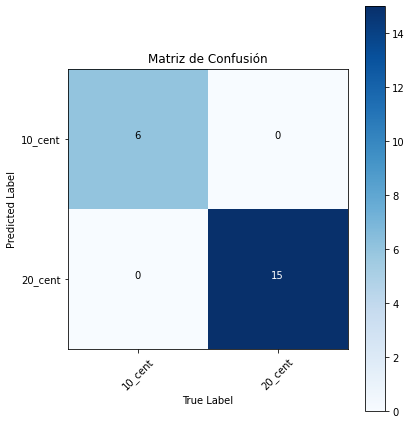

In [18]:
cm_plot_labels = {'10_cent': 0, '20_cent': 1}
plot_confusion_matrix(cm, cm_plot_labels, title='Matriz de Confusión')